In [1]:
"""Sanity check on booth function. All optimizers should converge."""
import pytest
import torch
import torchzero as tz

def booth(x,y):
    return (x + 2 * y - 7) ** 2 + (2 * x + y - 5) ** 2

x0 = (0, -8)

def _test_optimizer(lmbda, tol=1e-1):
    params = torch.tensor(x0, dtype=torch.float32, requires_grad=True)
    opt = lmbda([params])
    
    def closure(backward=True):
        loss = booth(*params)
        if backward:
            opt.zero_grad()
            loss.backward()
        return loss
    
    losses = []
    for i in range(100):
        loss = opt.step(closure)
        losses.append(loss)
        assert isinstance(loss, torch.Tensor), (i, type(loss), loss)
        assert torch.isfinite(loss), (i, loss)
        
    assert loss <= tol, (tol, loss, [i.detach().cpu().item() for i in losses])
    print(opt.__class__.__name__, loss.detach().cpu().item())

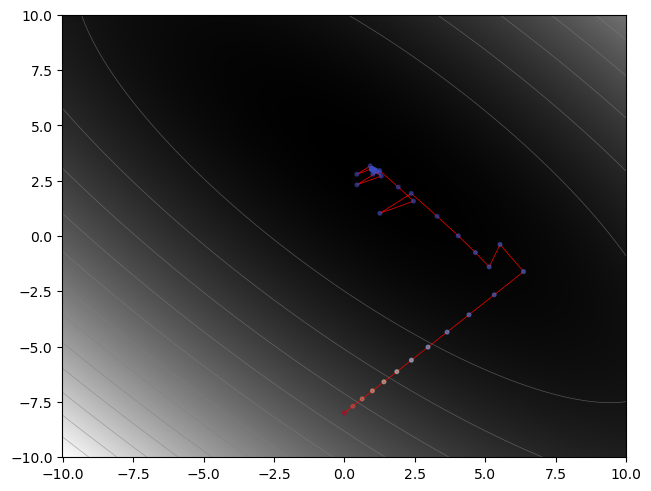

In [18]:
from visualbench.tasks.function_descent import FunctionDescent

f = FunctionDescent('booth')
opt = lambda p: tz.optim.Modular(p, [tz.m.Interpolate(tz.m.Rprop(), tz.m.Adam(), 0.5), tz.m.LR(3e-1)])
f.run(opt(f.parameters()), 100)
f.plot_solution()

In [12]:
opt = lambda p: tz.optim.Modular(p, [tz.m.Grafting(tz.m.Lion(), tz.m.Adam()), tz.m.LR(1e-2)])
_test_optimizer(opt)        

AssertionError: (0.1, tensor(2.8793, grad_fn=<AddBackward0>), [698.0, 676.580078125, 655.5199584960938, 634.8197021484375, 614.4791259765625, 594.4983520507812, 574.877197265625, 555.615478515625, 536.7132568359375, 518.1703491210938, 499.9867248535156, 482.1623229980469, 464.6968688964844, 447.5902404785156, 430.8425598144531, 414.45355224609375, 398.42315673828125, 382.7510986328125, 367.4374084472656, 352.48187255859375, 337.8842468261719, 323.6445617675781, 309.76251220703125, 296.2378845214844, 283.0705261230469, 270.2602844238281, 257.806884765625, 245.71006774902344, 233.96958923339844, 222.58522033691406, 211.5567169189453, 200.88368225097656, 190.56581115722656, 180.60275268554688, 170.994140625, 161.739501953125, 152.83843994140625, 144.29037475585938, 136.0947723388672, 128.2510528564453, 120.75846862792969, 113.61632537841797, 106.82373809814453, 100.37976837158203, 94.28333282470703, 88.53321075439453, 83.1280288696289, 78.06611633300781, 73.345703125, 68.96456909179688, 64.92021179199219, 61.20964050292969, 57.82928466796875, 54.77489471435547, 52.041290283203125, 49.622154235839844, 47.50968551635742, 45.69417190551758, 44.16337203979492, 42.90170669555664, 41.88917922973633, 41.099937438964844, 40.5003662109375, 40.04684066772461, 39.683448791503906, 39.34043884277344, 38.935672760009766, 38.38166427612305, 37.60042190551758, 36.543094635009766, 35.20399475097656, 33.619510650634766, 31.85276222229004, 29.9748592376709, 28.051708221435547, 26.137998580932617, 24.27611541748047, 22.49738121032715, 20.82382583618164, 19.269947052001953, 17.844051361083984, 16.549205780029297, 15.38390827178955, 14.342504501342773, 13.415392875671387, 12.589183807373047, 11.846900939941406, 11.16833209991455, 10.530773162841797, 9.910370826721191, 9.284221649169922, 8.63321304321289, 7.945143222808838, 7.217258453369141, 6.457151889801025, 5.681460857391357, 4.912662506103516, 4.1751017570495605, 3.491302251815796, 2.8792734146118164])